# **UPLOADING DATASET** 

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn import linear_model
#from sklearn import cross_validation
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from random import seed
from random import randrange
from csv import reader
import csv
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
mse=[]
mae=[]
rsq=[]
rmse=[]
acy=[]
np.random.seed(0)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving KDDTrain+_20Percent.csv to KDDTrain+_20Percent.csv


In [5]:
import io
df=pd.read_csv(io.BytesIO(uploaded['KDDTrain+_20Percent.csv']))
print(df)

       duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data    SF        491          0     0   
1             0           udp     other    SF        146          0     0   
2             0           tcp   private    S0          0          0     0   
3             0           tcp      http    SF        232       8153     0   
4             0           tcp      http    SF        199        420     0   
...         ...           ...       ...   ...        ...        ...   ...   
25187         0           tcp      exec  RSTO          0          0     0   
25188         0           tcp  ftp_data    SF        334          0     0   
25189         0           tcp   private   REJ          0          0     0   
25190         0           tcp      nnsp    S0          0          0     0   
25191         0           tcp    finger    S0          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0           

In [6]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'class12'
]
df[0:19289]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class12
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,0,tcp,private,REJ,0,0,0,0,0,0,...,2,0.05,1.00,0.05,1.00,0.00,0.00,0.80,1.00,anomaly
19285,0,udp,domain_u,SF,44,127,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal
19286,0,tcp,private,S0,0,0,0,0,0,0,...,3,0.01,0.08,0.01,0.00,1.00,1.00,0.00,0.00,anomaly
19287,0,tcp,http,S0,0,0,0,0,0,0,...,63,0.25,0.02,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [7]:
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['class12'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 25192 rows.
The number of data points are: 25192
The number of features are: 42
The different type of output labels are: {'anomaly', 'normal'}
The number of different output labels are: 2


# **DATA TRANSFORMATION**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [9]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df['protocol_type'].value_counts()


tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [11]:
df['service'].value_counts()

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64

In [12]:
df['flag'].value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64

In [13]:
df['class12'].value_counts()

normal     13449
anomaly    11743
Name: class12, dtype: int64

In [14]:
protocol_type = {'tcp': 0, 'udp': 1, 'icmp': 2}
protocol_type.items()
df.protocol_type = [protocol_type[item] for item in df.protocol_type]
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class12
0,0,0,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,1,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,0,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,0,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,0,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,0,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,0,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,0,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [15]:
service = {'aol': 1, 'auth': 2, 'bgp': 3, 'courier': 4, 'csnet_ns': 5, 'ctf': 6, 'daytime': 7, 'discard': 8,
                 'domain': 9, 'domain_u': 10, 'echo': 11, 'eco_i': 12, 'ecr_i': 13, 'efs': 14, 'exec': 15,
                 'finger': 16, 'ftp': 17, 'ftp_data': 18, 'gopher': 19, 'harvest': 20, 'hostnames': 21, 'http': 22,
                 'http_2784': 23, 'http_443': 24, 'http_8001': 25, 'imap4': 26, 'IRC': 27, 'iso_tsap': 28,
                 'klogin': 29, 'kshell': 30, 'ldap': 31, 'link': 32, 'login': 33, 'mtp': 34, 'name': 35,
                 'netbios_dgm': 36, 'netbios_ns': 37, 'netbios_ssn': 38, 'netstat': 39, 'nnsp': 40, 'nntp': 41,
                 'ntp_u': 42, 'other': 43, 'pm_dump': 44, 'pop_2': 45, 'pop_3': 46, 'printer': 47, 'private': 48,
                 'red_i': 49, 'remote_job': 50, 'rje': 51, 'shell': 52, 'smtp': 53, 'sql_net': 54, 'ssh': 55,
                 'sunrpc': 56, 'supdup': 57, 'systat': 58, 'telnet': 59, 'tftp_u': 60, 'tim_i': 61, 'time': 62,
                 'urh_i': 63, 'urp_i': 64, 'uucp': 65, 'uucp_path': 66, 'vmnet': 67, 'whois': 68, 'X11': 69,
                 'Z39_50': 70}
service.items()

dict_items([('aol', 1), ('auth', 2), ('bgp', 3), ('courier', 4), ('csnet_ns', 5), ('ctf', 6), ('daytime', 7), ('discard', 8), ('domain', 9), ('domain_u', 10), ('echo', 11), ('eco_i', 12), ('ecr_i', 13), ('efs', 14), ('exec', 15), ('finger', 16), ('ftp', 17), ('ftp_data', 18), ('gopher', 19), ('harvest', 20), ('hostnames', 21), ('http', 22), ('http_2784', 23), ('http_443', 24), ('http_8001', 25), ('imap4', 26), ('IRC', 27), ('iso_tsap', 28), ('klogin', 29), ('kshell', 30), ('ldap', 31), ('link', 32), ('login', 33), ('mtp', 34), ('name', 35), ('netbios_dgm', 36), ('netbios_ns', 37), ('netbios_ssn', 38), ('netstat', 39), ('nnsp', 40), ('nntp', 41), ('ntp_u', 42), ('other', 43), ('pm_dump', 44), ('pop_2', 45), ('pop_3', 46), ('printer', 47), ('private', 48), ('red_i', 49), ('remote_job', 50), ('rje', 51), ('shell', 52), ('smtp', 53), ('sql_net', 54), ('ssh', 55), ('sunrpc', 56), ('supdup', 57), ('systat', 58), ('telnet', 59), ('tftp_u', 60), ('tim_i', 61), ('time', 62), ('urh_i', 63), ('ur

In [16]:
df.service = [service[item] for item in df.service]
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class12
0,0,0,18,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,1,43,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,48,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,0,22,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,22,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,0,48,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,0,48,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,0,48,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,0,50,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,0,48,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [17]:
flag = {'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'RSTO': 4, 'S1': 5, 'SH': 6, 'S2': 7, 'RSTOS0': 8, 'S3': 9,
              'OTH': 10}
flag.items()

dict_items([('SF', 0), ('S0', 1), ('REJ', 2), ('RSTR', 3), ('RSTO', 4), ('S1', 5), ('SH', 6), ('S2', 7), ('RSTOS0', 8), ('S3', 9), ('OTH', 10)])

In [18]:
df.flag = [flag[item] for item in df.flag]
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class12
0,0,0,18,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,1,43,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,48,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,0,22,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,22,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,0,48,2,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,0,48,1,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,0,48,1,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,0,50,1,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,0,48,1,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [19]:
class12 = {'normal': 99, 'anomaly': 100}
class12.items()

dict_items([('normal', 99), ('anomaly', 100)])

In [20]:
df.class12=[class12[item] for item in df.class12]
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class12
0,0,0,18,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,99
1,0,1,43,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,99
2,0,0,48,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,100
3,0,0,22,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,99
4,0,0,22,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99
5,0,0,48,2,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,100
6,0,0,48,1,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,100
7,0,0,48,1,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,100
8,0,0,50,1,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,100
9,0,0,48,1,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,100


# **OUTLIER DTETECTION & REMOVAL - Interquartile Range**

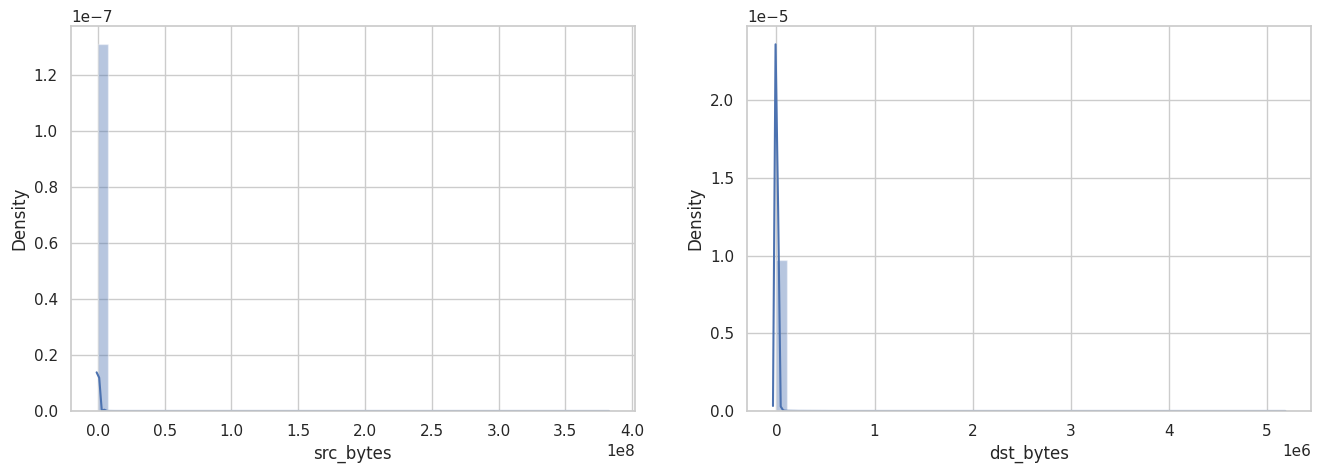

In [21]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['src_bytes'])
plt.subplot(1,2,2)
sns.distplot(df['dst_bytes'])
plt.show()

<Axes: >

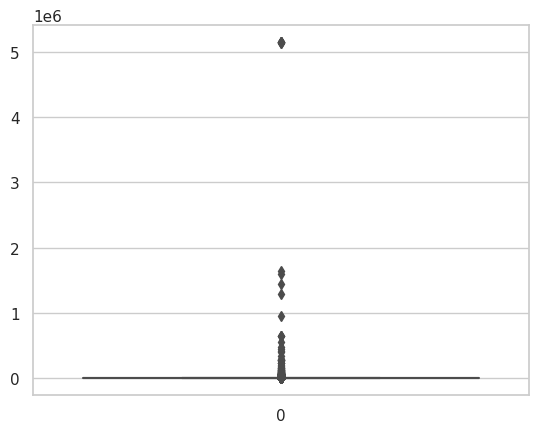

In [22]:
sns.boxplot(df['dst_bytes'])

In [23]:
percentile25 = df['dst_bytes'].quantile(0.25)
percentile75 = df['dst_bytes'].quantile(0.75)
print(percentile25)
print(percentile75)

0.0
530.25


In [24]:
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


In [25]:
df[df['dst_bytes'] > upper_limit]
df[df['dst_bytes'] < lower_limit]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class12


In [26]:
new_df = df[df['dst_bytes'] < upper_limit]
new_df.shape

(20493, 42)

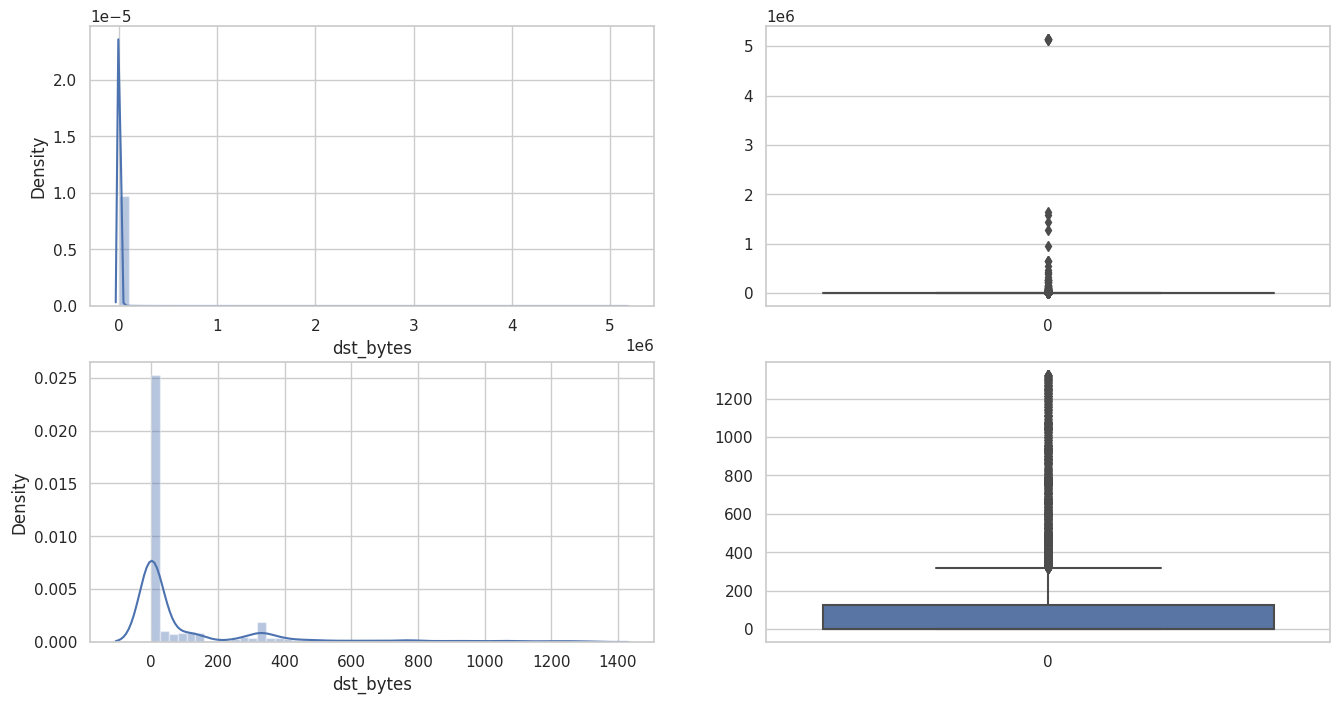

In [27]:
#comparing the plots before and after
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['dst_bytes'])
plt.subplot(2,2,2)
sns.boxplot(df['dst_bytes'])
plt.subplot(2,2,3)
sns.distplot(new_df['dst_bytes'])
plt.subplot(2,2,4)
sns.boxplot(new_df['dst_bytes'])
plt.show()

# **FEATURE DETECTION & REMOVAL**

In [28]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class12
0,0,0,18,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,99
1,0,1,43,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,99
2,0,0,48,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,100
3,0,0,22,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,99
4,0,0,22,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99


In [29]:
kdd_train_clean = df.drop(
    ['land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'rerror_rate',
    'srv_rerror_rate',
    'dst_host_rerror_rate'], axis=1)

In [30]:
kdd_train_clean.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,class12
0,0,0,18,0,491,0,0,2,2,0.0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.00,99
1,0,1,43,0,146,0,0,13,1,0.0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,99
2,0,0,48,1,0,0,0,123,6,1.0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,100
3,0,0,22,0,232,8153,1,5,5,0.2,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.01,99
4,0,0,22,0,199,420,1,30,32,0.0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,99


In [31]:
df=kdd_train_clean

# **DIVIDING THE DATASET**

In [32]:
y = new_df['dst_host_srv_rerror_rate']
y

0        0.0
1        0.0
2        0.0
4        0.0
5        1.0
        ... 
25187    1.0
25188    0.0
25189    1.0
25190    0.0
25191    0.0
Name: dst_host_srv_rerror_rate, Length: 20493, dtype: float64

In [33]:
x = new_df.drop(['dst_host_srv_rerror_rate'], axis=1)
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class12
0,0,0,18,0,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.0,0.0,0.05,99
1,0,1,43,0,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.0,0.0,0.00,99
2,0,0,48,1,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.0,1.0,0.00,100
4,0,0,22,0,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,99
5,0,0,48,2,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.0,0.0,1.00,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,15,4,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.0,0.0,1.00,100
25188,0,0,18,0,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.0,0.0,0.00,100
25189,0,0,48,2,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.0,0.0,1.00,100
25190,0,0,40,1,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.0,1.0,0.00,100


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=100)

In [36]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14345, 41) (6148, 41)
(14345,) (6148,)


In [37]:
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: 14345
No. of testing examples: 6148


LABEL ENCODING

In [38]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
y_test_transformed = lab.fit_transform(y_test)
#view transformed values
print(y_transformed)
print(y_test_transformed)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# **TRAINING & TESTING OF MODEL USING ML ALGORITHMS**

In [40]:
import time

DECISION TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier
c=DecisionTreeClassifier()
start_time = time.time()
c.fit(X_train,y_transformed)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.15114068984985352


In [45]:
start_time = time.time()
y_test_pred = c.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.019902706146240234


In [47]:

print("Train score is:", c.score(X_train,y_transformed))
print("Test score is:", c.score(X_test,y_test_transformed))



Train score is: 0.9997908678982224
Test score is: 0.8347430058555628


RANDOM FOREST 

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
start_time = time.time()
rf.fit(X_train,y_transformed)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  1.4578514099121094


In [49]:
start_time = time.time()
y_test_pred = rf.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.7778511047363281


In [50]:
print("Train score is:", rf.score(X_train,y_transformed))
print("Test score is:", rf.score(X_test,y_test_transformed))

Train score is: 0.9997908678982224
Test score is: 0.8402732595966168


LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()
start_time = time.time()
logreg.fit(X_train,y_transformed)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  11.17069411277771


In [58]:
start_time = time.time()
y_test_pred = logreg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.04351186752319336


In [59]:
print("Train score is:", logreg.score(X_train,y_transformed))
print("Test score is:", logreg.score(X_test,y_test_transformed))

Train score is: 0.846775880097595
Test score is: 0.8370201691607027


SUPPORT VECTOR MACHINE - SVM

In [57]:
from sklearn.svm import SVC
sc =SVC()
start_time = time.time()
sc.fit(X_train,y_transformed)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  4.379247426986694


In [61]:
start_time = time.time()
y_test_pred = sc.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  15.78131365776062


In [62]:
print("Train score is:", sc.score(X_train,y_transformed))
print("Test score is:", sc.score(X_test,y_test_transformed))

Train score is: 0.8407807598466365
Test score is: 0.8370201691607027


# **ANALYSING TRAINING & TESTING MODELS**

ANALYZING TRAINING DATA 

<BarContainer object of 4 artists>

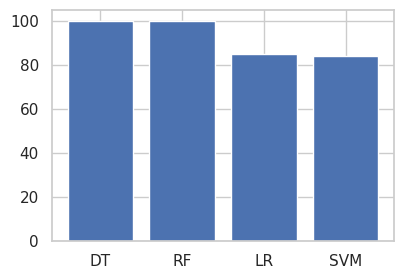

In [66]:
names = ['DT', 'RF', 'LR', 'SVM']
values = [99.979, 99.979, 84.677, 84.078]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

ANALYZING TESTING DATA 

<BarContainer object of 4 artists>

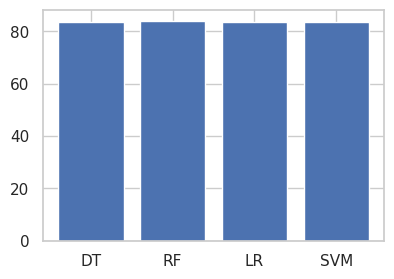

In [67]:
names = ['DT', 'RF', 'LR', 'SVM']
values = [83.474, 84.027, 83.702, 83.702]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

ANALYZING TRAINING TIME

<BarContainer object of 4 artists>

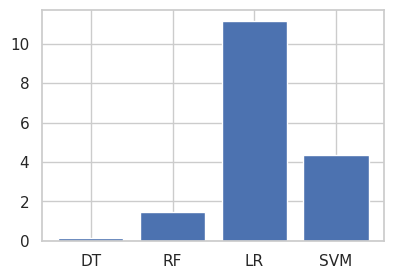

In [68]:
names = ['DT', 'RF', 'LR', 'SVM']
values = [0.15114, 1.45785, 11.17069, 4.37924]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

ANALYZING TESTING TIME

<BarContainer object of 4 artists>

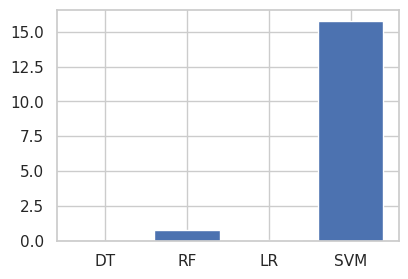

In [69]:
names = ['DT', 'RF', 'LR', 'SVM']
values = [0.01990, 0.77785, 0.04351, 15.78131]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)

# **CONCLUSION**

**The above analysis of different models states that the Decision Tree model best fits our data considering both accuracy and time complexity.**